In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#installing Sastrawi library
pip install Sastrawi

In [3]:
#installing flair library
pip install flair

In [4]:
import pandas as pd
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')

import pickle
import spacy
import random
from spacy.util import minibatch, compounding
from spacy import load, displacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#creating a dataframe from csv file
df = pd.read_csv('https://raw.githubusercontent.com/hendrip8/Data-Fellowship-IYKRA/main/NLP/tweet_covid_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,Date,Tweet,User
0,0,2021-07-21 23:59:53,@jokowi Kami sekeluarga dari awal covid sdh pr...,Sulis
1,1,2021-07-21 23:59:49,Pemerintah 'Nunggak' Bayar Klaim Covid-19 ke R...,Saitama
2,2,2021-07-21 23:59:47,@CTNurza @DoktorSamhan Masalahnya manusia yg t...,Love Palestine🇵🇸
3,3,2021-07-21 23:59:44,"Ketawa saja bung @Dennysiregar7 , mereka itu o...",yahya sukardi 2017
4,4,2021-07-21 23:59:41,Aku iki cuma overthinking ae. Gumun juga klo n...,Lidia Darwin


# Pre-Processing

## Cleaning

In [7]:
def clean_data(text):
    text = re.sub('@([a-zA-Z0-9_]+)', '', text) #menghapus @mention
    text = re.sub('@[^\s]+', '', text) #menghapus @mention
    text = re.sub('#[\s]+', '', text) #menghapus hashtag
    text = re.sub('RT[\s]+', '', text) #menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) #menghapus hyperlink
    text = re.sub(' \d+', ' ', text) #menghapus angka
    text = re.sub('[^\w\s]', '', text) #menghapus tanda baca
    text = re.sub(r'\b[a-zA-Z]\b', '', text) #menghapus single character
    text = re.sub('\n', '', text) #menghapus \n
    text = re.sub('\r', '', text) #menghapus \r
    text = text.strip() #menghapus spasi
    text = text.lower() #lowercase
    return text

In [8]:
df['Tweet'] = df['Tweet'].apply(clean_data)
df['Tweet']

0      kami sekeluarga dari awal covid sdh prokes pak...
1      pemerintah nunggak bayar klaim covid19 ke rs r...
2      masalahnya manusia yg tak berakal tidak berota...
3      ketawa saja bung   mereka itu orangorang yg ku...
4      aku iki cuma overthinking ae gumun juga klo nd...
                             ...                        
995    dalam keadaan darurat prosesnya jangan lama2 b...
996           rohi diri lvaccin hari denya kaml bl covid
997    tnipolri bagikan masker kepada masyarakat guna...
998    hallo sobat polri anakanak sangat rentan terha...
999    bupati karawang cellica nurrachadiana kembali ...
Name: Tweet, Length: 1000, dtype: object

## Stopword

In [9]:
#Stopword from custom data
alay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
#Memisahkan kalimat menjadi kata
slang = [word_tokenize(text) for text in alay['slang']]
slang

[['woww'],
 ['aminn'],
 ['met'],
 ['netaas'],
 ['keberpa'],
 ['eeeehhhh'],
 ['kata2nyaaa'],
 ['hallo'],
 ['kaka'],
 ['ka'],
 ['daah'],
 ['aaaaahhhh'],
 ['yaa'],
 ['smga'],
 ['slalu'],
 ['amiin'],
 ['kk'],
 ['trus'],
 ['kk'],
 ['sii'],
 ['nyenengin'],
 ['bgt'],
 ['gemess'],
 ['akuuu'],
 ['jgn'],
 ['yaa'],
 ['udah'],
 ['gitu'],
 ['aja'],
 ['gemesiin'],
 ['menyenangkn'],
 ['rb'],
 ['akau'],
 ['saranin'],
 ['nemuin'],
 ['yah'],
 ['met'],
 ['mnis2nya'],
 ['gtu'],
 ['tu'],
 ['idolaa'],
 ['bangett'],
 ['kaakk'],
 ['baaiikkk'],
 ['telaatt'],
 ['kaak'],
 ['yg'],
 ['lg'],
 ['skarang'],
 ['yg'],
 ['sempet'],
 ['karna'],
 ['ngga'],
 ['karna'],
 ['mantep'],
 ['loohhh'],
 ['yeee'],
 ['baguuuuus'],
 ['sampe'],
 ['ngikutin'],
 ['gayany'],
 ['ngikutin'],
 ['lg'],
 ['bnk'],
 ['awaas'],
 ['siip'],
 ['abizzzz'],
 ['kerrrrennnn'],
 ['sayaa'],
 ['pengen'],
 ['kpan'],
 ['bgt'],
 ['sma'],
 ['sdkit'],
 ['bngt'],
 ['lgu'],
 ['bener2'],
 ['kharismanya'],
 ['aq'],
 ['yg'],
 ['jdi'],
 ['lgi'],
 ['gk'],
 ['kek'],
 

In [10]:
#Merubah list dalam list menjadi 1 list
slang_ = list(itertools.chain.from_iterable(slang))
slang_

['woww',
 'aminn',
 'met',
 'netaas',
 'keberpa',
 'eeeehhhh',
 'kata2nyaaa',
 'hallo',
 'kaka',
 'ka',
 'daah',
 'aaaaahhhh',
 'yaa',
 'smga',
 'slalu',
 'amiin',
 'kk',
 'trus',
 'kk',
 'sii',
 'nyenengin',
 'bgt',
 'gemess',
 'akuuu',
 'jgn',
 'yaa',
 'udah',
 'gitu',
 'aja',
 'gemesiin',
 'menyenangkn',
 'rb',
 'akau',
 'saranin',
 'nemuin',
 'yah',
 'met',
 'mnis2nya',
 'gtu',
 'tu',
 'idolaa',
 'bangett',
 'kaakk',
 'baaiikkk',
 'telaatt',
 'kaak',
 'yg',
 'lg',
 'skarang',
 'yg',
 'sempet',
 'karna',
 'ngga',
 'karna',
 'mantep',
 'loohhh',
 'yeee',
 'baguuuuus',
 'sampe',
 'ngikutin',
 'gayany',
 'ngikutin',
 'lg',
 'bnk',
 'awaas',
 'siip',
 'abizzzz',
 'kerrrrennnn',
 'sayaa',
 'pengen',
 'kpan',
 'bgt',
 'sma',
 'sdkit',
 'bngt',
 'lgu',
 'bener2',
 'kharismanya',
 'aq',
 'yg',
 'jdi',
 'lgi',
 'gk',
 'kek',
 'lgunya',
 'kpan',
 'kereeeeennnn',
 'nyamain',
 'slalu',
 'lakik',
 'siippp',
 'bkn',
 'nyangka',
 'bangettt',
 'kereeen',
 'wihhhhhh',
 'tp',
 'inget',
 'bingitsss',


In [11]:
#Memisahkan kalimat menjadi kata
formal = [word_tokenize(text) for text in alay['formal']]
formal

[['wow'],
 ['amin'],
 ['selamat'],
 ['menetas'],
 ['keberapa'],
 ['eh'],
 ['kata-katanya'],
 ['halo'],
 ['kakak'],
 ['kak'],
 ['dah'],
 ['ah'],
 ['ya'],
 ['semoga'],
 ['selalu'],
 ['amin'],
 ['kakak'],
 ['terus'],
 ['kakak'],
 ['sih'],
 ['menyenangkan'],
 ['banget'],
 ['gemas'],
 ['aku'],
 ['jangan'],
 ['ya'],
 ['sudah'],
 ['begitu'],
 ['saja'],
 ['menggemaskan'],
 ['menyenangkan'],
 ['ribu'],
 ['aku'],
 ['menyarankan'],
 ['menemukan'],
 ['ya'],
 ['selamat'],
 ['manis-manisnya'],
 ['begitu'],
 ['itu'],
 ['idola'],
 ['banget'],
 ['kak'],
 ['baik'],
 ['telat'],
 ['kak'],
 ['yang'],
 ['lagi'],
 ['sekarang'],
 ['yang'],
 ['sempat'],
 ['karena'],
 ['enggak'],
 ['karena'],
 ['mantap'],
 ['loh'],
 ['ya'],
 ['bagus'],
 ['sampai'],
 ['mengikuti'],
 ['gayanya'],
 ['mengikuti'],
 ['lagi'],
 ['bang'],
 ['awas'],
 ['sip'],
 ['habis'],
 ['keren'],
 ['saya'],
 ['pengin'],
 ['kapan'],
 ['banget'],
 ['sama'],
 ['sedikit'],
 ['banget'],
 ['lagu'],
 ['benar-benar'],
 ['karismanya'],
 ['aku'],
 ['yang'],


In [12]:
#Merubah list dalam list menjadi 1 list
formal_ = list(itertools.chain.from_iterable(slang))
formal_

['woww',
 'aminn',
 'met',
 'netaas',
 'keberpa',
 'eeeehhhh',
 'kata2nyaaa',
 'hallo',
 'kaka',
 'ka',
 'daah',
 'aaaaahhhh',
 'yaa',
 'smga',
 'slalu',
 'amiin',
 'kk',
 'trus',
 'kk',
 'sii',
 'nyenengin',
 'bgt',
 'gemess',
 'akuuu',
 'jgn',
 'yaa',
 'udah',
 'gitu',
 'aja',
 'gemesiin',
 'menyenangkn',
 'rb',
 'akau',
 'saranin',
 'nemuin',
 'yah',
 'met',
 'mnis2nya',
 'gtu',
 'tu',
 'idolaa',
 'bangett',
 'kaakk',
 'baaiikkk',
 'telaatt',
 'kaak',
 'yg',
 'lg',
 'skarang',
 'yg',
 'sempet',
 'karna',
 'ngga',
 'karna',
 'mantep',
 'loohhh',
 'yeee',
 'baguuuuus',
 'sampe',
 'ngikutin',
 'gayany',
 'ngikutin',
 'lg',
 'bnk',
 'awaas',
 'siip',
 'abizzzz',
 'kerrrrennnn',
 'sayaa',
 'pengen',
 'kpan',
 'bgt',
 'sma',
 'sdkit',
 'bngt',
 'lgu',
 'bener2',
 'kharismanya',
 'aq',
 'yg',
 'jdi',
 'lgi',
 'gk',
 'kek',
 'lgunya',
 'kpan',
 'kereeeeennnn',
 'nyamain',
 'slalu',
 'lakik',
 'siippp',
 'bkn',
 'nyangka',
 'bangettt',
 'kereeen',
 'wihhhhhh',
 'tp',
 'inget',
 'bingitsss',


In [13]:
#remove stopwords
raw = df['Tweet']
dff = [word_tokenize(paragraf) for paragraf in raw]
indo = stopwords.words('indonesian')
indo.extend(['yg','nya', 'dgn', 'dg', 'dr', 'ya', 'yaa', 'aja', 'utk', 'ni', 'tp', 'amp', 'dah', 'krn'
            ,'udah'])
indo.extend(slang_)
indo.extend(formal_)
hasil_stopword = []  
for i in range(len(dff)):
    data = [word for word in dff[i][:] if word not in indo]
    hasil_stopword.append(data)

hasil_join = []
for join in range(len(hasil_stopword)):
    hasil_join.append(' '.join(hasil_stopword[join]))
clean_data = hasil_join

In [14]:
#Mengetahui banyaknya kata yg muncul
df_token = [word_tokenize(paragraf) for paragraf in clean_data]
iter_= list(itertools.chain(*df_token))
fqdist = FreqDist(iter_)
fqdist.most_common(50)

[('covid', 661),
 ('covid19', 347),
 ('kena', 109),
 ('ppkm', 101),
 ('vaksin', 100),
 ('pandemi', 72),
 ('pemerintah', 60),
 ('positif', 54),
 ('darurat', 53),
 ('masyarakat', 52),
 ('sakit', 49),
 ('penanganan', 48),
 ('indonesia', 46),
 ('percaya', 45),
 ('meninggal', 45),
 ('virus', 44),
 ('penyebaran', 44),
 ('rumah', 43),
 ('kalo', 41),
 ('warga', 39),
 ('kematian', 35),
 ('semoga', 34),
 ('desa', 32),
 ('prokes', 31),
 ('negara', 31),
 ('rakyat', 30),
 ('juli', 29),
 ('kesehatan', 29),
 ('rs', 27),
 ('sembuh', 27),
 ('pas', 27),
 ('tau', 27),
 ('gue', 27),
 ('pagi', 27),
 ('masuk', 26),
 ('allah', 24),
 ('berita', 24),
 ('banget', 24),
 ('akibat', 23),
 ('turun', 23),
 ('angka', 23),
 ('protokol', 23),
 ('keluarga', 22),
 ('gejala', 22),
 ('masker', 21),
 ('nak', 20),
 ('corona', 20),
 ('jawa', 20),
 ('terpapar', 19),
 ('ruang', 19)]

In [15]:
clean_data_save = pd.DataFrame({'Tweet':clean_data})
clean_data_save.to_csv('data_clean_tweet.csv')

# Workcloud

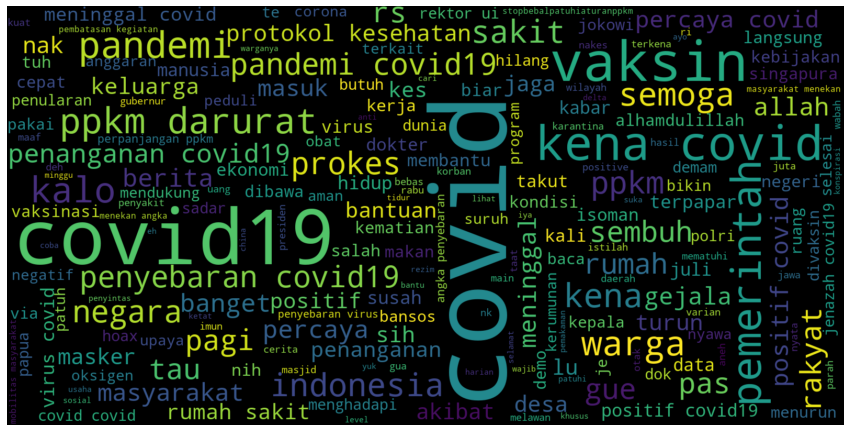

In [16]:
paragraf = ' '.join(clean_data)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(paragraf)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Feature Engineering

## Count Vectorizer (Bag of Words)

In [17]:
cv = CountVectorizer()
x_sentence = cv.fit_transform(clean_data)

In [18]:
cv.get_feature_names()

['00',
 '000',
 '000t',
 '014',
 '0500',
 '0526',
 '066',
 '072021',
 '0730',
 '10',
 '117066',
 '13',
 '14',
 '15',
 '150',
 '166',
 '19',
 '19072021',
 '199',
 '200',
 '217',
 '2172021',
 '2172021polripeduli',
 '22',
 '22072021',
 '253',
 '302',
 '3020906',
 '383',
 '383sebaran',
 '412',
 '47',
 '498',
 '511',
 '62',
 '672021',
 '69',
 '691',
 '700an',
 '710',
 '772',
 '7ta',
 '883',
 '887',
 '893',
 '904jateng',
 '945terkonfirmasi',
 '950',
 '963',
 '985',
 'aa',
 'aamiintambahimun',
 'aamiintruestory',
 'abah',
 'abai',
 'abaikan',
 'abamaze',
 'abang',
 'abdurachman',
 'abiszzzz',
 'acara',
 'acc',
 'aceh',
 'adab',
 'adadikompas',
 'adakah',
 'adek',
 'adem',
 'adha',
 'adhyaksa',
 'adhyaksasinergitas',
 'adik',
 'adik2',
 'adikku',
 'adipuratabanan',
 'adisasmito',
 'adisasmitomeminta',
 'administrasi',
 'ads',
 'adu',
 'aduhai',
 'aeeee',
 'aekarang',
 'afiat',
 'afrika',
 'afsel',
 'after',
 'agama',
 'agenda',
 'agensi',
 'agi',
 'agr',
 'agustus',
 'ah',
 'ahli',
 'ahmad',
 

In [19]:
x_sentence.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
x_sentence_df = pd.DataFrame(x_sentence.toarray(), columns=cv.get_feature_names())

In [21]:
x_sentence_df

,00,000,000t,014,0500,0526,066,072021,0730,10,117066,13,14,15,150,166,19,19072021,199,200,217,2172021,2172021polripeduli,22,22072021,253,302,3020906,383,383sebaran,412,47,498,511,62,672021,69,691,700an,710,...,wtckl,wuhan,wujud,wujudnya,x10,xbetul,xboleh,xda,xx,yaaaarezim,yaallah,yaapakah,yaasiin3612semangat,yab,yakan,yakinlah,yaman,yasonnalaolykumhampasti,yatuhan,yayuk,ye,yeebukti,yerlah,yoook,yours,youtube,yowes,yuk,yuliana,yunus,yustisi,yusuf,yuuuuu,zaman,zayed,zodiak,zona,zonasi,zubaidah,ಠಠ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
x_sentence_df.to_csv('count_vectorizer.csv')

## Tfidf Vectorizer

In [23]:
tfidf = TfidfVectorizer()
x2_sentence = tfidf.fit_transform(clean_data)

In [24]:
x2_sentence_df = pd.DataFrame(x2_sentence.toarray(), columns=tfidf.get_feature_names())

In [25]:
x2_sentence_df

,00,000,000t,014,0500,0526,066,072021,0730,10,117066,13,14,15,150,166,19,19072021,199,200,217,2172021,2172021polripeduli,22,22072021,253,302,3020906,383,383sebaran,412,47,498,511,62,672021,69,691,700an,710,...,wtckl,wuhan,wujud,wujudnya,x10,xbetul,xboleh,xda,xx,yaaaarezim,yaallah,yaapakah,yaasiin3612semangat,yab,yakan,yakinlah,yaman,yasonnalaolykumhampasti,yatuhan,yayuk,ye,yeebukti,yerlah,yoook,yours,youtube,yowes,yuk,yuliana,yunus,yustisi,yusuf,yuuuuu,zaman,zayed,zodiak,zona,zonasi,zubaidah,ಠಠ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
x2_sentence_df.to_csv('tfidf_vectorizer.csv')

## Part Of Speech (POS)

In [27]:
from flair.data_fetcher import NLPTaskDataFetcher, NLPTask
corpus = NLPTaskDataFetcher.load_corpus(NLPTask.UD_INDONESIAN)

2021-07-23 03:08:26,805 Reading data from /root/.flair/datasets/ud_indonesian
2021-07-23 03:08:26,807 Train: /root/.flair/datasets/ud_indonesian/id_gsd-ud-train.conllu
2021-07-23 03:08:26,812 Dev: /root/.flair/datasets/ud_indonesian/id_gsd-ud-dev.conllu
2021-07-23 03:08:26,817 Test: /root/.flair/datasets/ud_indonesian/id_gsd-ud-test.conllu


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) load_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  


In [28]:
#‘UPOS’ or ‘Universal part-of-speech tag’ used as we only need to determine part-of-speech only
tag_type = 'upos'
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

In [29]:
#word embedding
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, BertEmbeddings
from typing import List

embedding_types: List[TokenEmbeddings] = [
 WordEmbeddings('id-crawl'),
 WordEmbeddings('id'),
]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

In [30]:
#sequence tagging
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                      tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [31]:
#training the model
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)
trainer.train('resources/taggers/example-universal-pos',learning_rate=0.1,
              mini_batch_size=32,max_epochs=5)

2021-07-23 03:09:06,924 ----------------------------------------------------------------------------------------------------
2021-07-23 03:09:06,930 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('id-crawl')
    (list_embedding_1): WordEmbeddings('id')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=600, out_features=600, bias=True)
  (rnn): LSTM(600, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=20, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-07-23 03:09:06,933 ----------------------------------------------------------------------------------------------------
2021-07-23 03:09:06,936 Corpus: "Corpus: 4477 train + 559 dev + 557 test sentences"
2021-07-23 03:09:06,938 ----------------------------------------------------------------------------------------------------
2021-07-23 03:09:06,940 

{'dev_loss_history': [14.210297584533691,
  8.292543411254883,
  7.01949405670166,
  6.680829048156738,
  6.302857875823975],
 'dev_score_history': [0.7882, 0.8806, 0.9005, 0.9037, 0.9091],
 'test_score': 0.914,
 'train_loss_history': [30.470552178791593,
  14.344979742595127,
  11.610830054964339,
  10.52664007799966,
  9.846421330315726]}

In [32]:
#testing the model to a sentence
from flair.data import Sentence

sentence = Sentence('sekeluarga covid prokes usaha goyah berhenti kuliah penggurangan karyawan satunya usaha apapun rumah menghasilkan uang jual makan seninkamis')
tag_pos = SequenceTagger.load('resources/taggers/example-universal-pos/best-model.pt')
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

2021-07-23 03:23:18,435 loading file resources/taggers/example-universal-pos/best-model.pt
sekeluarga <NOUN> covid <ADP> prokes <NOUN> usaha <NOUN> goyah <ADJ> berhenti <VERB> kuliah <NOUN> penggurangan <ADP> karyawan <NOUN> satunya <DET> usaha <NOUN> apapun <DET> rumah <NOUN> menghasilkan <VERB> uang <NOUN> jual <NOUN> makan <NOUN> seninkamis <PUNCT>


## NER

In [33]:
#pickle used from https://github.com/hendrip8/Data-Fellowship-IYKRA/blob/main/NLP/ner_spacy_fmt_datasets.pickle
with open('/content/drive/MyDrive/0projects/IYKRA DATA FELLOWSHIP/Training Phase/2. Introduction to NLP and Text Mining/work/ner_spacy_fmt_datasets.pickle', 'rb') as f:
  ner_spacy_fmt_datasets = pickle.load(f)

In [34]:
nlp = spacy.blank("id")
nlp.add_pipe(nlp.create_pipe('ner'))
nlp.begin_training()

In [35]:
ner = nlp.get_pipe("ner")
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [36]:
for _, annotations in ner_spacy_fmt_datasets:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])
        break

In [37]:
# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):
  # Training for 5 iterations
  for iteration in range(5):
    # shuufling examples  before every iteration
    random.shuffle(ner_spacy_fmt_datasets)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(ner_spacy_fmt_datasets, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
    print("Losses at iteration {}".format(iteration), losses)

Losses at iteration 0 {'ner': 46239.57259220586}
Losses at iteration 1 {'ner': 44683.817156361285}
Losses at iteration 2 {'ner': 44386.25510619996}
Losses at iteration 3 {'ner': 43994.2005630882}
Losses at iteration 4 {'ner': 43926.96152683906}


In [38]:
# test 
doc = nlp("Arahan menteri Desa dalam penangan Covid")
print(doc.ents)
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

(Desa,)
Entities [('Desa', 'ORGANIZATION')]


In [39]:
# test 2
doc = nlp("SELUBUNG yang menyelimuti kasus penembakan yang menewaskan Pendeta Yeremia Zanambani di Kabupaten Intan Jaya, Papua kian terkuak. Hasil investigasi Tim Gabungan Pencari Fakta (TGPF) kasus tersebut menyatakan bahwa penembakan di Intan Jaya diduga dilakukan oleh aparat keamanan")
print(doc.ents)
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

(Kabupaten Intan, Papua, Gabungan Pencari Fakta (TGPF, Intan Jaya)
Entities [('Kabupaten Intan', 'LOCATION'), ('Papua', 'LOCATION'), ('Gabungan Pencari Fakta (TGPF', 'ORGANIZATION'), ('Intan Jaya', 'LOCATION')]


In [40]:
# test 3
doc = nlp("Mantan ketua DPR Setya Novanto sedang berada di Bali bersama Nurdin")
print(doc.ents)
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

(DPR Setya, Bali)
Entities [('DPR Setya', 'PERSON'), ('Bali', 'LOCATION')]


In [ ]:
"""from pathlib import Path

output_dir = Path('nlp_id_checkpoint_2020_10_26')
nlp.to_disk(output_dir)
print("Saved model to", output_dir)"""

In [ ]:
"""# load existing model 
output_dir = 'nlp_id_checkpoint_2020_10_26'
print("Loading from", output_dir)
nlp_updated = spacy.load(output_dir)"""